before and after removing redundant events 99025, 12216 


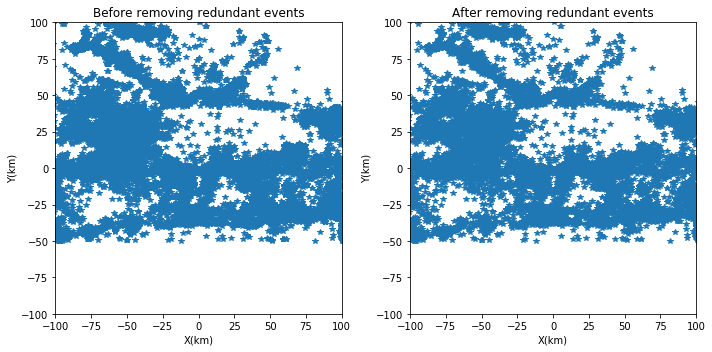

In [21]:
#!/usr/bin/env python
# coding: utf-8
"""
HJ@USC
2018-10-25
event.car: evid lat lon dep x y mag
phase_all.dat.latlonxy.region
Output: new event.dat_remove-redundant-events
"""
import numpy as np
import matplotlib.pyplot as plt
import random
import os
events = np.loadtxt('event.car')
threshold_evnum=1
dx,dy,dz = 2,2,2 # km
xmin,xmax = -1000,1000  # km
ymin,ymax = -1000,1000
zmin,zmax = -1000,1000
nxcell=int(np.ceil((xmax-xmin)/dx))
nycell=int(np.ceil((ymax-ymin)/dy))
nzcell=int(np.ceil((zmax-zmin)/dz))
ev_x_total = []
ev_y_total = []
xyzcell = {}
for ev in events:
    evid = int(ev[0])
    lat = ev[1]
    lon = ev[2]
    ev_dep = ev[3]
    ev_x,ev_y = ev[4],ev[5]
    ev_x_total.append(ev_x)
    ev_y_total.append(ev_y)
    #if (ev_x>region_x[0] and ev_x<region_x[1]) and (ev_y>region_y[0] and ev_y<region_y[1]):
    if True:
        ix,iy,iz=int(np.ceil((ev_x-xmin)/dx)),int(np.ceil((ev_y-ymin)/dy)),int(np.ceil((ev_dep-zmin)/dz))
        if (ix,iy,iz) in xyzcell:
            xyzcell[ix,iy,iz].append(ev)
        else:
            xyzcell[ix,iy,iz]=[ev]
count_old = []
count_new = []
for i in xyzcell:
    count_old.append(len(xyzcell[i]))
    temp = xyzcell[i]
    if len(xyzcell[i]) >threshold_evnum:
        xyzcell[i] = random.sample(temp, threshold_evnum)
    count_new.append(len(xyzcell[i]))
# plt.subplot(1,2,1)
# plt.hist(count_old,color='blue',alpha=0.5,label='count_old')
# plt.legend()
# plt.subplot(1,2,2)
# plt.hist(count_new,color='pink',alpha=0.5,label='count_new')
# plt.legend()
# plt.tight_layout()
# plt.pause(1)
ev_x_new = []
ev_y_new = []
ev_id_new = []
for i in xyzcell:
    temp=xyzcell[i]
    for ev in temp:
        x,y=ev[4],ev[5]
        ev_x_new.append(x)
        ev_y_new.append(y)
        ev_id_new.append(int(ev[0]))

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(ev_x_total,ev_y_total,'*')
plt.title('Before removing redundant events')
plt.xlabel('X(km)')
plt.ylabel('Y(km)')
plt.axis([-100,100,-100,100])
plt.subplot(1,2,2)
plt.plot(ev_x_new,ev_y_new,'*')
plt.axis([-100,100,-100,100])
plt.title('After removing redundant events')
plt.xlabel('X(km)')
plt.ylabel('Y(km)')
plt.tight_layout()
plt.savefig('BeforeAndAfter-remove-redundant-events.png',dpi=300)

print('before and after removing redundant events {}, {} '.format(len(ev_x_total),len(ev_x_new)))




# if you have event.dat, so you can uncomment this block
# print new event.dat after matching the ev_id_new
# with open('./Input/event.dat','r') as f:
#     temp = f.read().splitlines()
# with open ('event.dat_remove-redundant-events','w') as f :
#     for ev in temp:
#         if int(ev.split()[-2]) in ev_id_new:
#             f.write(ev + '\n')





In [22]:
with open('phase_Redundant.dat.reloc.latlon.region','w') as f:
    count_p=0
    count_s=0
    count_p_new=0
    count_s_new=0
    count_ev = 0
    for year in range(2000,2017):
        print(year)
        with open('phase_selected'+str(year)+'.dat.reloc.latlonxy.region','r') as ff:
            temp=ff.read().splitlines()
        flag_write=0
        for line in temp:
            temp_info=line.split()
            if temp_info[0]=="#":
                evid = int(temp_info[-3])
                if evid in ev_id_new:
                    count_ev = count_ev +1
                    f.write(line+'\n')
                    flag_write=1
                else:
                    flag_write=0
            else:
                staname = temp_info[0]
                dt = temp_info[1]
                weight = temp_info[2]
                phtype = temp_info[3]
                if phtype=='P' or phtype =='p':
                    count_p = count_p+1
                elif phtype=="S" or phtype=="s":
                    count_s = count_s+1
                if flag_write==1:
                    if phtype=='P' or phtype =='p':
                        count_p_new = count_p_new+1
                    elif phtype=="S" or phtype=="s":
                        count_s_new = count_s_new+1
                    f.write(line+'\n') 
print('old and new P Phase: ',count_p,count_s)
print('old and new S Phase: ',count_p_new,count_s_new)
print('event number: ', count_ev)
os.system('sh delete_xy.sh')

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
old and new P Phase:  1171981 274930
old and new S Phase:  134061 33375
event number:  12216
